<div align="right">
<table style="width:50%">
  <tr>
    <th>Hazırlayan</th>
    <th>Versiyon</th> 
    <th>Tarih</th> 
    <th>Dil</th>
  </tr>
  <tr>
    <td>dataFLOYD</td>
    <td>v1.00</td> 
    <td>08 Eyl 2018</td>
    <td>TR </td>
  </tr>
</table>
</div>

<div class="alert alert-danger">
<br>
Ön koşullar ile ilgili bilgi vererek başlanmalı, böylece okuyanlar ilk önce eksiklerini tamamlayabilir. <br>
<br>
ÖN KOŞULLAR
    <br><a href="https://www.datafloyd.com/tr/veri-bilimi-icin-temel-python-kullanimi/">Temel Python kullanımı</a>
    <br><a href="https://www.datafloyd.com/tr/pyhton-numpy-kutuphanesinin-kullanimi/">Numpy kütüphanesi kullanımı</a>
</div>

<!-- ICONS -->
<link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/4.7.0/css/font-awesome.min.css">

<!-- BOOTSTRAP -->
<!-- Latest compiled and minified CSS -->
<link rel="stylesheet" href="https://maxcdn.bootstrapcdn.com/bootstrap/3.3.7/css/bootstrap.min.css">

<!-- jQuery library -->
<script src="https://ajax.googleapis.com/ajax/libs/jquery/3.3.1/jquery.min.js"></script>

<!-- Latest compiled JavaScript -->
<script src="https://maxcdn.bootstrapcdn.com/bootstrap/3.3.7/js/bootstrap.min.js"></script>

# Veri Biliminin Temeller - k-NN (Nearest Neighbor: En Yakın Komşuluk) algoritması 

<div class="well">
k-NN (k-Nearest Neighbor: En Yakın Komşuluk) tüm makine öğrenmesi algoritmaları arasında bence öğrenmesi ve uygulaması en kolay algoritmalardan biridir. Çünkü konsept olarak çok basittir. Diğer algoritmalarda olduğu gibi burada çok kompleks fonksiyonlar işin içinde olmadığı için matematiğe çok girmenize gerek yoktur. Makine öğrenmesi hakkında fikri olmayan birine bile bu konsepti çok rahat anlatabilirsiniz. 
</div>

İncelemeye algoritmanın sözde kodunu (pseudo code) yazarak başlayalım isterseniz:

<div class="alert alert-warning">
k-NN sınıflandırma algoritması<br>
1- Bir k değeri ve uzaklık metriği seçelim <br>
2- Veri seti içerisinde sınıflandırmak istediğimiz örneğe ait en yakın k adet komşuyu bulalım <br>
3- Çoğunluk kararına göre örneğin sınıfı atanır
</div>

![kNN](kNN.png)

Şekilde belirtildiği gibi en fazla sayıdaki sınıfın etiketi örneğimize atanır.

k-NN bu kadar etkin ve kolay bir algoritma olmasına karşın bazı önemli dezavantajlara sahiptir. 
* Örnek sayısı arttığında yapmamız gereken karşılaştırma işlemlerinin sayısı da lineer bir şekilde artmaktadır ve bu çok ağır bir işlem yükü getirmektedir.
* Özellikle boyut sayısı ve k sayısı arttığında kNN algoritması "overfitting" problemi ile karşı karşıya kalmaktadır. 

Küçük bir kodlama örneği yapalım şimdi. Bu örnek için iris veri setini kullanalım. *(Laf aramızda ben sıkıldım bu iris veri setinden artık :) İlerleyen yazılarımızda daha başka veri setleri kullanmaya çalışacağım)*

In [35]:
# pandas yüklemek lazım!
import pandas as pd
# numpy
import numpy as np

# matplotlib
import matplotlib.pyplot as plt
# ggplot stilinde kullanalım
plt.style.use('ggplot')

%matplotlib notebook

# Scikit Learn
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier

<IPython.core.display.Javascript object>


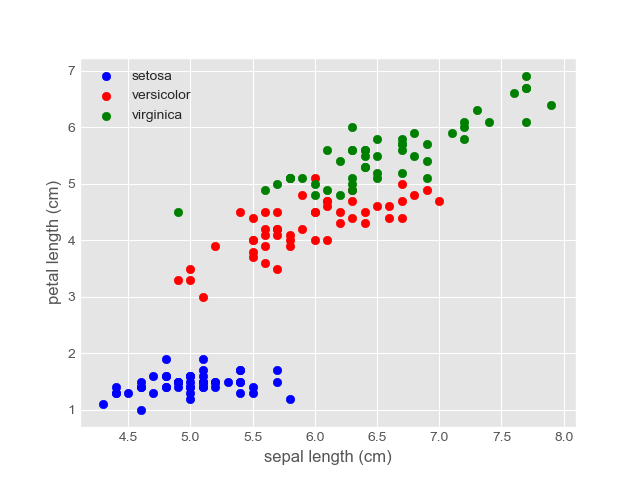

In [36]:
# iris verisetini yukluyoruz
iris = datasets.load_iris()

# 1. ve 3. özniteliği alalım 
X = iris.data[:, [0,2]]
y = iris.target

plt.figure()
# Haydi çizdirelim bunu
# Setosa için
plt.scatter(X[y==0,0],X[y==0,1],c="b")
# Versicolor için
plt.scatter(X[y==1,0],X[y==1,1],c='r')
# Virginica için
plt.scatter(X[y==2,0],X[y==2,1],c="g")

plt.legend(iris["target_names"])
plt.xlabel(iris.feature_names[0]);
plt.ylabel(iris.feature_names[2]);

In [23]:
# Sınıflandırıcıyı çağırmadan önce karar sınırlarını çizdirmek için fonksiyon hazırlayalım
def plot_decision_region(X, y, classifier, legend=[],resolution=0.02):

    
    # marker ve renk seçimi
    # burada sınıf sayısı kadar modifiye etmek gerekiyor aksi takdirde hata alınır.
    markers = ('o', 'o', 'o')
    colors = ('red', 'blue', 'green')
    
    # karar bölgesi ayarlanıyor
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
    np.arange(x2_min, x2_max, resolution))
    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap="coolwarm")
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # legend kısmını düzgün göstermek için eklendi
    line_list = []
    # örnekler çizdiriliyor
    for idx, cl in enumerate(np.unique(y)):
        dummy = plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=colors[idx],
                    marker=markers[idx], label=cl)
        line_list.append(dummy)

    plt.legend(line_list,legend)

<IPython.core.display.Javascript object>


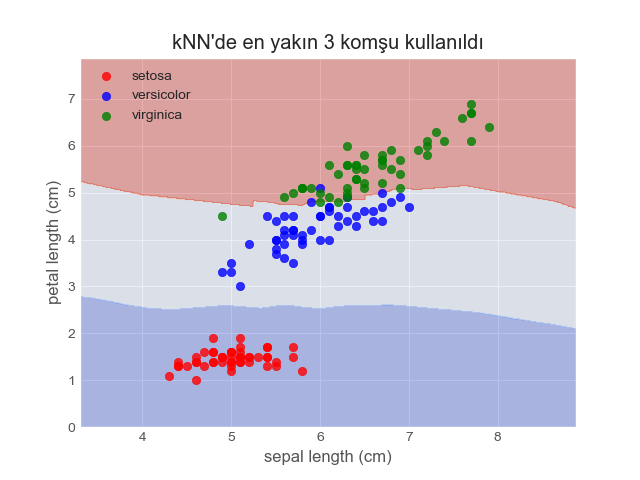

Text(0.5,1,"kNN'de en yakın 3 komşu kullanıldı")

In [37]:
# Sınıflandırıcıyı eğitelim ve görselleştirelim
kNN = KNeighborsClassifier(n_neighbors=3,metric="euclidean")
kNN.fit(X,y)

plt.figure()
plot_decision_region(X,y,kNN,legend=iris.target_names)

plt.xlabel(iris.feature_names[0]);
plt.ylabel(iris.feature_names[2]);
plt.title("kNN'de en yakın 3 komşu kullanıldı");

Şimdi isterseniz bir de k değerini arttıralım neler olacak bakalım. Değişimi daha iyi anlayabilmek için bu değeri 21 seçelim

<IPython.core.display.Javascript object>


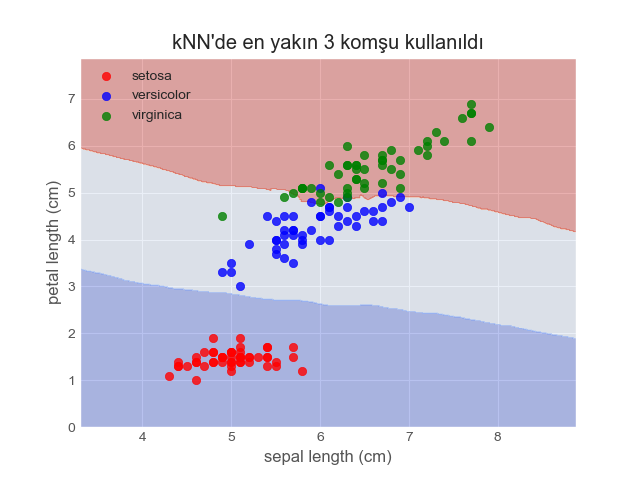

In [40]:
# Sınıflandırıcıyı eğitelim ve görselleştirelim
kNN = KNeighborsClassifier(n_neighbors=21,metric="euclidean")
kNN.fit(X,y)

plt.figure()
plot_decision_region(X,y,kNN,legend=iris.target_names)

plt.xlabel(iris.feature_names[0]);
plt.ylabel(iris.feature_names[2]);
plt.title("kNN'de en yakın 3 komşu kullanıldı");

Gördüğünüz gibi sınır değişti, çünkü artık en yakın 21 komşuluk değerlendiriliyor. Bir de uzaklık ölçütünü değiştirelim bakalım neler olacak.

<IPython.core.display.Javascript object>


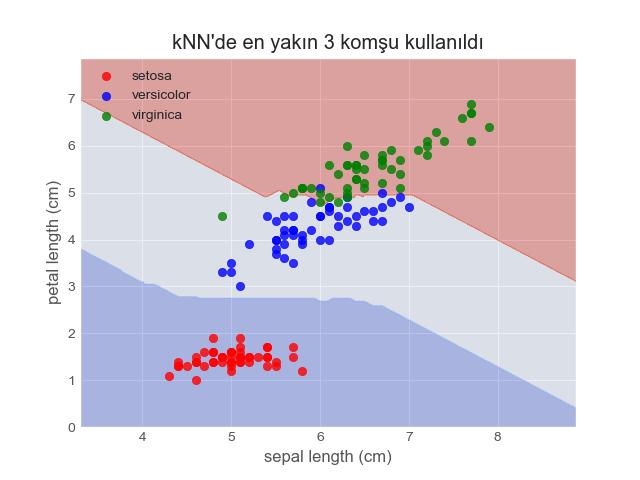

In [43]:
# Sınıflandırıcıyı eğitelim ve görselleştirelim
kNN = KNeighborsClassifier(n_neighbors=21,metric="chebyshev")
kNN.fit(X,y)

plt.figure()
plot_decision_region(X,y,kNN,legend=iris.target_names)

plt.xlabel(iris.feature_names[0]);
plt.ylabel(iris.feature_names[2]);
plt.title("kNN'de en yakın 3 komşu kullanıldı");

Buradaki "Chebysev" metriği "max(|x - y|)" şeklinde tanımlandığı için karar sınırları oldukça değişti gördüğünüz gibi.

Bir başka yazımızda tekrar görüşmek üzere esen kalın!